# Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset - Diabetes Dataset

### About Dataset
Dataset ini berasal dari Institut Nasional Diabetes dan Penyakit Pencernaan dan Ginjal
Penyakit. Tujuan dari dataset ini adalah untuk memprediksi secara diagnostik apakah seorang pasien menderita diabetes,
berdasarkan pengukuran diagnostik tertentu yang termasuk dalam dataset. Beberapa batasan ditempatkan
pada pemilihan contoh-contoh ini dari basis data yang lebih besar. Secara khusus, semua pasien di sini adalah perempuan
berusia minimal 21 tahun dan berasal dari suku Indian Pima.2
Dari kumpulan data dalam file (.csv) Kita dapat menemukan beberapa variabel, beberapa di antaranya independen
(beberapa variabel prediktor medis) dan hanya satu variabel dependen target (Hasil).

[Diabetes Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Import the dataset

In [3]:
dataset = pd.read_csv("data/diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Preprocessing

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# checking for null values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
X = dataset.iloc[:, 0 : 8 ].values 
Y = dataset.iloc[:, -1 ].values # Labels
print(X)
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

# Divide data into training and test sets for data and labels

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Membuat Model

## Mengimpor library Keras dan turunannya

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Inisialisasi ANN

In [11]:
MesinKlasifikasi = Sequential()

# Menambah input layer dan hidden layer pertama
MesinKlasifikasi.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
# Menambah hidden layer kedua
MesinKlasifikasi.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Menambah output layer
MesinKlasifikasi.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Meenjalankan ANN
MesinKlasifikasi.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


c:\Kuliah\Semester 6\Machine Learning\Tugas_3\venv\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Fitting ANN ke training set
MesinKlasifikasi.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6370 - loss: 0.6912  
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6478 - loss: 0.6800
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.6695 - loss: 0.6453
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.6192 - loss: 0.6039
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.6272 - loss: 0.5664
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.7788 - loss: 0.5200
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.7826 - loss: 0.5004
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.7539 - loss: 0.5137
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.7810 - loss: 0.4752
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.7600 - loss: 0.5112
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.7719 - loss: 0.4876
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 

# Predict the result

In [13]:
# Memprediksi hasil test set
y_pred = MesinKlasifikasi.predict(X_test)
y_pred = (y_pred > 0.5)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [19]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)

In [15]:
cm

array([[94, 13],
       [18, 29]], dtype=int64)

In [16]:
y_pred

array([[ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [

# Evaluasi Model

In [17]:
MesinKlasifikasi.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8235 - loss: 0.4204  


[0.43514683842658997, 0.798701286315918]

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       107
           1       0.69      0.62      0.65        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154



# Visualisation the result

Epoch 1/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.1508

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8239 - loss: 0.4333 - val_accuracy: 0.8387 - val_loss: 0.3562
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8278 - loss: 0.4228 - val_accuracy: 0.8065 - val_loss: 0.3604
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8378 - loss: 0.3730 - val_accuracy: 0.8065 - val_loss: 0.3637
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8190 - loss: 0.3973 - val_accuracy: 0.8065 - val_loss: 0.3678
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7796 - loss: 0.4769 - val_accuracy: 0.8065 - val_loss: 0.3722
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8432 - loss: 0.3836 - val_accuracy: 0.8065 - val_loss: 0.3761
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8278 - loss: 0.3830 - val_accuracy: 0.8065 - val_loss: 0.3814
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8320 - loss: 0.3797 - val_accuracy: 0.7742 - val_loss: 0.3

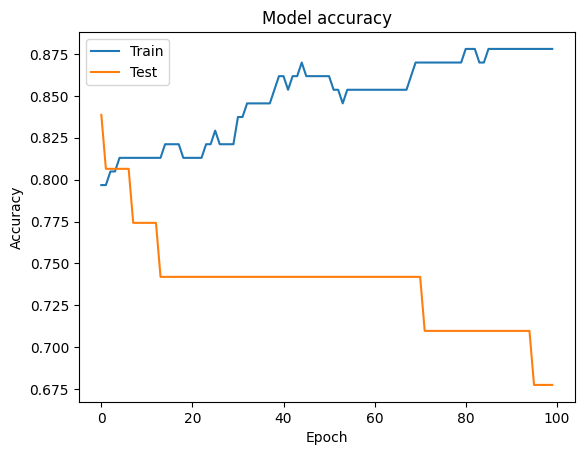

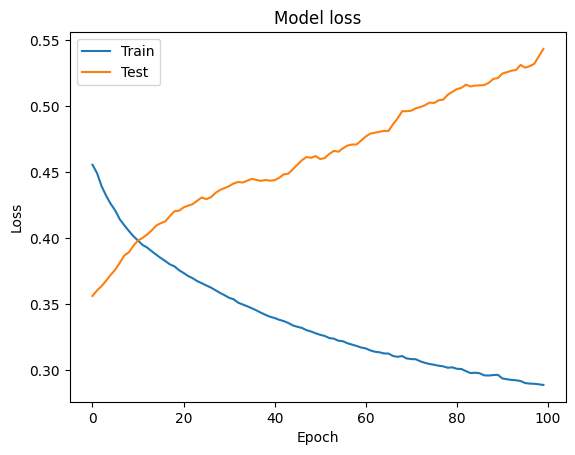

In [18]:
history = MesinKlasifikasi.fit(X_test, y_test, validation_split=0.20, epochs=100, batch_size=10, verbose=1)

# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()